# Mass shootings in America


### Jason Hepburn 43687105
### Jake Pacione 43677894

# Introduction
This report aims to delve into mass shooting data collected over the past 50 years for the United States of America. From this data we will aim to do a few things. The main problem statements inlcude:

- Exploring how mass shootings in the USA have changed over time
- Determining if these mass shootings influence the stock pricing of major gun manufacturers
- Observe the effects of mass shootings on gun related searches throught the world.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'files/Mass Shootings Dataset.csv', encoding = "ISO-8859-1", parse_dates=["Date"])
df.head()

S#                                 Title            Location       Date  \
0   1         Las Vegas Strip mass shooting       Las Vegas, NV 2017-10-01   
1   2            San Francisco UPS shooting   San Francisco, CA 2017-06-14   
2   3     Pennsylvania supermarket shooting     Tunkhannock, PA 2017-06-07   
3   4  Florida awning manufacturer shooting    Orlando, Florida 2017-06-05   
4   5      Rural Ohio nursing home shooting  Kirkersville, Ohio 2017-05-12   

                                             Summary  Fatalities  Injured  \
0                                                NaN          58      515   
1  Jimmy Lam, 38, fatally shot three coworkers an...           3        2   
2  Randy Stair, a 24-year-old worker at Weis groc...           3        0   
3  John Robert Neumann, Jr., 45, a former employe...           5        0   
4  Thomas Hartless, 43, shot and killed a former ...           3        0   

   Total victims Mental Health Issues   Race Gender  Latitude  Longitude  
0            573              Unclear    NaN   Male       NaN        NaN  
1              5                  Yes  Asian   Male       NaN        NaN  
2              3              Unclear  White   Male       NaN        NaN  
3              5              Unclear    NaN   Male       NaN        NaN  
4              3                  Yes  White   Male       NaN        NaN

In [3]:
# Add the loaction for Las Vegas shooting

df.loc[0,'Latitude'] = 36.095157
df.loc[0,'Longitude'] = -115.171832

## Map data

In [4]:
import folium
import branca


m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=3)

def add_marker(row):
    if not np.isnan(row['Latitude']):
        html = "<h1>" + row['Title'] + "</h1>" 
        html += "<p>"
        html += "Date: " + row['Date'].strftime("%a, %d %B %Y")
        html += "<br>Fatalities: " + str(row['Fatalities'])
        html += "<br>Injured: " + str(row['Injured'])
        html += "<br><br>" + str(row['Summary'])
        html += "</p>"
        
        iframe = branca.element.IFrame(html=html, width=500, height=300)
        popup = folium.Popup(iframe, max_width=500)
        
        
        marker = folium.CircleMarker([row['Latitude'], row['Longitude']], 
                                     radius=row['Fatalities'], 
                                     color='red', 
                                     popup=popup)
        marker.add_to(m)

df.apply(add_marker, axis=1)
m

In [5]:
m.save(r"shooting_map.html")

The above map is a visual representaion of the dataset. It uses locations in the form of latitude and longitude to plot the shootings over a world map. The marker size is determined in pixel size from the total victims (injured + fatalities). Each marker can be clicked on to show a popup with some informaiton about the event.

# Explore data

The following plot shows that the number of attacks per year has increased over the years. There are some years where this trend dips such as from 2000 to 2005 and 2010. The years 2015 and 2016 and unusually high.

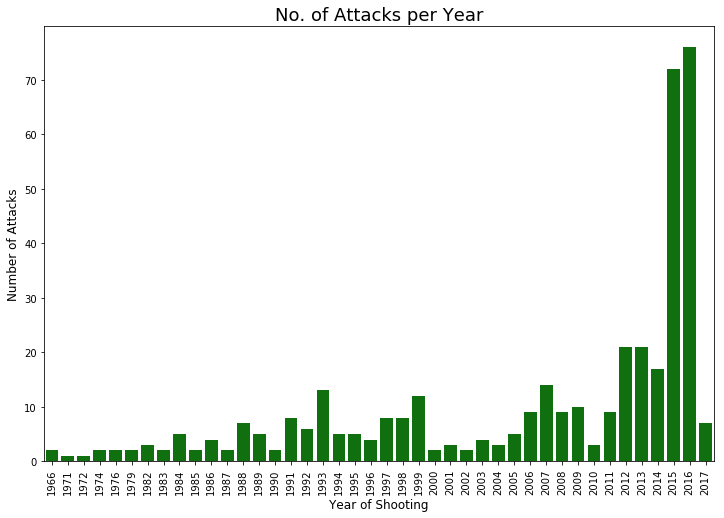

In [6]:
import seaborn as sns

df['Year'] = df['Date'].dt.year

plt.figure(figsize=(12,8))
sns.countplot(x='Year', data=df, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Year of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks per Year', fontsize=18)
plt.savefig("images/Attacks_year.png")
plt.show()

Shootings appear to be more common in February and March

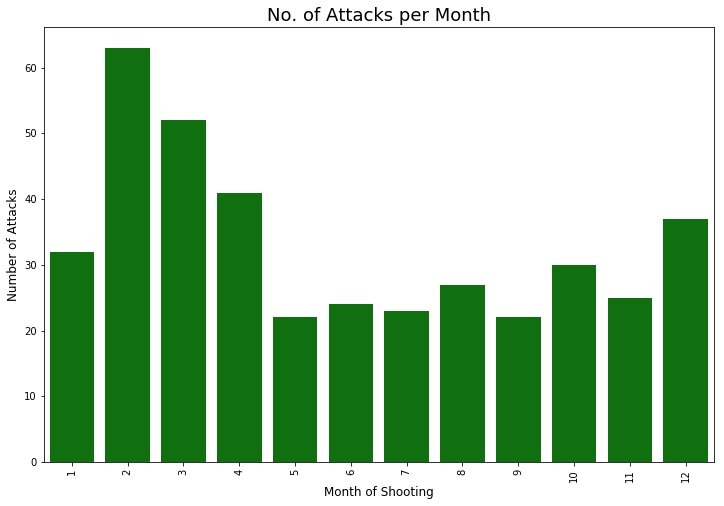

In [7]:
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12,8))
sns.countplot(x='Month', data=df, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Month of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks per Month', fontsize=18)
plt.savefig("images/Attacks_month.png")
plt.show()

There is no clear trend in the average fatalites per shooting over time. There are a few peaks at times but no general trend.

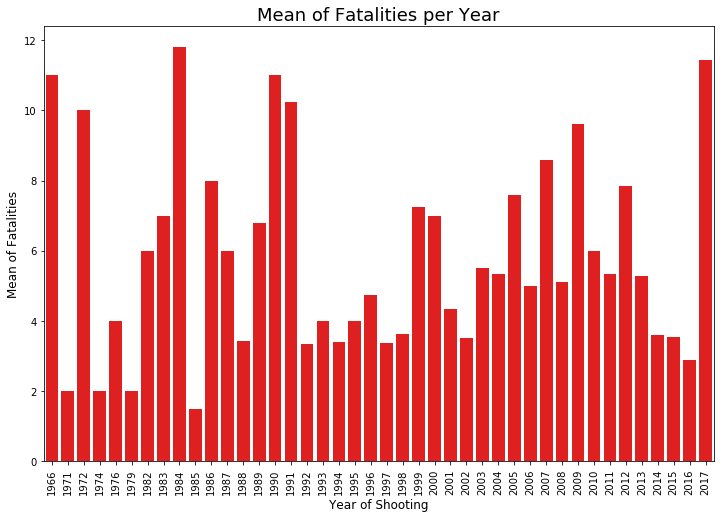

In [8]:
df_year = df[['Year', 'Fatalities', 'Total victims']].groupby('Year').aggregate(np.mean)

plt.figure(figsize=(12,8))
sns.barplot(df_year.index, df_year['Fatalities'], color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Year of Shooting', fontsize=12)
plt.ylabel('Mean of Fatalities', fontsize=12)
plt.title('Mean of Fatalities per Year', fontsize=18)
plt.savefig("images/Fatalities_year.png")
plt.show()

The average number of total victims per shooting over time also shows no trend. 2017 is a significant outlier with and unusally now number of shootings and one of those (Las Vegas) having a very hight number of victims.

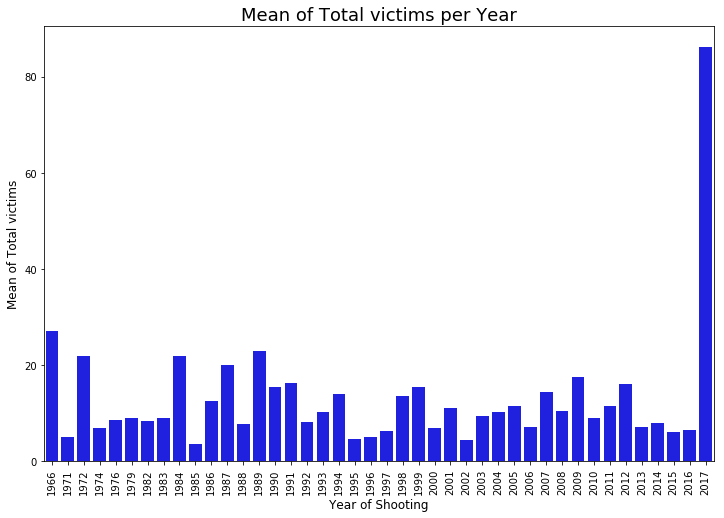

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(df_year.index, df_year['Total victims'], color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Year of Shooting', fontsize=12)
plt.ylabel('Mean of Total victims', fontsize=12)
plt.title('Mean of Total victims per Year', fontsize=18)
plt.savefig("images/Victims_year.png")
plt.show()

# Stock data

In [10]:
# load stock data
df_aobc = pd.read_csv(r'files/AOBC.csv', parse_dates=["Date"], index_col=["Date"])
df_rgr = pd.read_csv(r'files/RGR.csv', parse_dates=["Date"], index_col=["Date"])

In [11]:
df_aobc.head()

Open    High     Low   Close  Adj Close  Volume
Date                                                         
1999-08-17  1.2187  1.2187  1.0625  1.0625     1.0625   15100
1999-08-18  1.0625  1.1250  1.0625  1.1250     1.1250   10200
1999-08-19  1.0625  1.1250  0.8750  1.0000     1.0000   50800
1999-08-20  0.8750  1.2500  0.8750  1.2500     1.2500   32500
1999-08-23  1.2500  1.3125  1.1250  1.1250     1.1250   31100

In [12]:
df_rgr.head()

Open     High      Low    Close  Adj Close  Volume
Date                                                             
1980-03-18  1.46875  1.59375  1.46875  1.46875   0.350505    3200
1980-03-19  1.46875  1.46875  1.46875  1.46875   0.350505       0
1980-03-20  1.46875  1.46875  1.46875  1.46875   0.350505       0
1980-03-21  1.50000  1.62500  1.50000  1.50000   0.357963   14400
1980-03-24  1.50000  1.56250  1.43750  1.43750   0.343048    4800

Calculate the change in stock price after different number of days.

**Note:** this calculation only accounts for actually trading days **not** calender days

In [13]:
# calculate stock price X days after an incident
df_aobc['0Day'] = df_aobc['Close'] - df_aobc['Open']
df_aobc['1Day'] = df_aobc['Close'].shift(-1) - df_aobc['Open']
df_aobc['2Day'] = df_aobc['Close'].shift(-2) - df_aobc['Open']
df_aobc['5Day'] = df_aobc['Close'].shift(-5) - df_aobc['Open']
df_aobc['10Day'] = df_aobc['Close'].shift(-10) - df_aobc['Open']

df_rgr['0Day'] = df_rgr['Close'] - df_rgr['Open']
df_rgr['1Day'] = df_rgr['Close'].shift(-1) - df_rgr['Open']
df_rgr['2Day'] = df_rgr['Close'].shift(-2) - df_rgr['Open']
df_rgr['5Day'] = df_rgr['Close'].shift(-5) - df_rgr['Open']
df_rgr['10Day'] = df_rgr['Close'].shift(-10) - df_rgr['Open']

Descriptive statistics for the change in stock price on any day, one, two, five, or ten days later. All of the means are close to 0 showing in general that the price doesn't change much.

In [14]:
df_aobc[['Open', '0Day', '1Day', '2Day', '5Day', '10Day']].describe()

Open         0Day         1Day         2Day         5Day  \
count  4563.000000  4563.000000  4562.000000  4561.000000  4558.000000   
mean      7.626589    -0.003908    -0.000590     0.002669     0.012176   
std       7.089226     0.255043     0.408758     0.523456     0.751257   
min       0.093700    -3.129999    -8.620000    -9.380000   -10.640000   
25%       1.877500    -0.080000    -0.120000    -0.130000    -0.187500   
50%       4.780000     0.000000     0.000000     0.000000     0.000000   
75%      11.575000     0.080000     0.120000     0.150000     0.240000   
max      30.370001     1.770000     4.020001     3.840001     4.800001   

             10Day  
count  4553.000000  
mean      0.027599  
std       1.044151  
min     -10.750000  
25%      -0.250000  
50%       0.010000  
75%       0.360000  
max       5.360000

In [15]:
df_rgr[['Open', '0Day', '1Day', '2Day', '5Day', '10Day']].describe()

Open         0Day         1Day         2Day         5Day  \
count  9470.000000  9470.000000  9469.000000  9468.000000  9465.000000   
mean     16.460752    -0.004927     0.000620     0.006110     0.022298   
std      17.582854     0.510538     0.759068     0.945320     1.369066   
min       1.375000    -7.599998    -9.450005   -16.100002   -15.049999   
25%       5.656250    -0.100000    -0.140000    -0.187500    -0.250000   
50%       9.950000     0.000000     0.000000     0.000000     0.000000   
75%      16.375000     0.093750     0.160000     0.200000     0.312500   
max      84.739998     6.500000     9.309998     8.899998    11.259998   

             10Day  
count  9460.000000  
mean      0.049288  
std       1.877425  
min     -18.080002  
25%      -0.312500  
50%       0.000000  
75%       0.437500  
max      12.209999

In [16]:
# join the two stock dataframes together
df_stock = df_aobc.join(df_rgr, lsuffix="_aobc", rsuffix="_rgr")
df_stock.head()

Open_aobc  High_aobc  Low_aobc  Close_aobc  Adj Close_aobc  \
Date                                                                     
1999-08-17     1.2187     1.2187    1.0625      1.0625          1.0625   
1999-08-18     1.0625     1.1250    1.0625      1.1250          1.1250   
1999-08-19     1.0625     1.1250    0.8750      1.0000          1.0000   
1999-08-20     0.8750     1.2500    0.8750      1.2500          1.2500   
1999-08-23     1.2500     1.3125    1.1250      1.1250          1.1250   

            Volume_aobc  0Day_aobc  1Day_aobc  2Day_aobc  5Day_aobc  \
Date                                                                  
1999-08-17        15100    -0.1562    -0.0937    -0.2187     0.0313   
1999-08-18        10200     0.0625    -0.0625     0.1875     0.4375   
1999-08-19        50800    -0.0625     0.1875     0.0625     0.3125   
1999-08-20        32500     0.3750     0.2500     0.3750     0.3125   
1999-08-23        31100    -0.1250     0.0000     0.2500    -0.0625   

              ...      High_rgr  Low_rgr  Close_rgr  Adj Close_rgr  \
Date          ...                                                    
1999-08-17    ...        9.2500      9.0     9.0625       4.681344   
1999-08-18    ...        9.1875      9.0     9.0625       4.681344   
1999-08-19    ...        9.1875      9.0     9.0000       4.649058   
1999-08-20    ...        9.1250      9.0     9.1250       4.713630   
1999-08-23    ...        9.3750      9.0     9.3750       4.842770   

            Volume_rgr  0Day_rgr  1Day_rgr  2Day_rgr  5Day_rgr  10Day_rgr  
Date                                                                       
1999-08-17    122000.0   -0.1875   -0.1875   -0.2500    0.1875     0.3750  
1999-08-18     58900.0    0.0000   -0.0625    0.0625    0.6250     0.5000  
1999-08-19    112200.0   -0.1875   -0.0625    0.1875    0.4375     0.4375  
1999-08-20    141700.0    0.0000    0.2500    0.3125    0.5000     0.6250  
1999-08-23    132600.0    0.1250    0.1875    0.4375    0.3750     0.5000  

[5 rows x 22 columns]

From the mass shooting data set we group by data so that shootings on the same date don't count twice. 

In [17]:
df_mass = df.groupby('Date').aggregate(np.max)
df_mass.shape

(289, 14)

We join the stock data to the mass shooting data by date.

**Note:** Any shooting that happens on a non trading day is **not** matched in this join.

In [18]:
mass_stock = df_mass.join(df_stock)
mass_stock = mass_stock.dropna(subset=['0Day_rgr', '0Day_aobc'])

In [19]:
mass_stock[['Fatalities', 'Total victims']].describe()

Fatalities  Total victims
count  120.000000     120.000000
mean     4.575000       8.608333
std      4.637557      10.341477
min      0.000000       3.000000
25%      2.000000       4.000000
50%      4.000000       5.000000
75%      6.000000       9.000000
max     33.000000      82.000000

In [20]:
df[['Fatalities', 'Total victims']].describe()

Fatalities  Total victims
count  398.000000     398.000000
mean     5.015075      10.934673
std      5.721916      30.204271
min      0.000000       3.000000
25%      2.000000       4.000000
50%      4.000000       6.000000
75%      6.000000      10.000000
max     58.000000     573.000000

Unfortunately the sample of mass shootings that we were able to match with the stock data is **not** representative of the population of mass shootings in our data set. Because of this it is not valid to perform a t-test using this data.

The following is a t-test using this data anyway. As expected the none of the p-values are statistically significant as they are essentially a random sample of the stock data.

In [21]:
from scipy import stats

data = []

rows = ['0Day_aobc','1Day_aobc','2Day_aobc','5Day_aobc','10Day_aobc',
        '0Day_rgr','1Day_rgr','2Day_rgr','5Day_rgr','10Day_rgr']

for test in rows:
    datarow = {}
    datarow['Day'] = test
    test_stat = stats.ttest_1samp(mass_stock[test], df_stock[test].mean())
    datarow['std'] = mass_stock[test].std()
    datarow['mean'] = mass_stock[test].mean()
    datarow['statistic'] = test_stat.statistic
    datarow['Pvalue'] = test_stat.pvalue
    data.append(datarow)

df_test = pd.DataFrame(data)

df_test = df_test[['Day', 'mean', 'std', 'statistic', 'Pvalue']]
df_test

Day      mean       std  statistic    Pvalue
0   0Day_aobc  0.019083  0.346518   0.726791  0.468781
1   1Day_aobc  0.067933  0.618143   1.214333  0.227025
2   2Day_aobc  0.041292  0.832168   0.508425  0.612096
3   5Day_aobc  0.002495  1.389665  -0.076311  0.939300
4  10Day_aobc  0.160224  1.813160   0.801275  0.424569
5    0Day_rgr -0.030958  1.185394  -0.202156  0.840140
6    1Day_rgr  0.018771  1.641791   0.092252  0.926653
7    2Day_rgr -0.051771  2.385948  -0.291093  0.771487
8    5Day_rgr -0.002375  3.404263  -0.114374  0.909134
9   10Day_rgr  0.291917  4.024531   0.559735  0.576712

# Google Trends

In [22]:
dfMostDeadly = df[(df.Fatalities >= 10) & (df.Date >= '2004-01-01')]
dfMostDeadly

S#                                      Title  \
0      1              Las Vegas Strip mass shooting   
10    11                 Orlando nightclub massacre   
84    85               San Bernardino mass shooting   
85    86                 San Bernardino, California   
99   100                   Umpqua Community College   
175  176              Washington Navy Yard shooting   
176  177                       Washington Navy Yard   
193  194                    Newtown school shooting   
194  195               Sandy Hook Elementary School   
202  203                    Aurora theater shooting   
203  204                    Movie Theater in Aurora   
228  229                         Fort Hood massacre   
229  230                        Fort Hood Army Base   
230  231                       Binghamton shootings   
231  232  Immigration Services Center in Binghamton   
235  236                     Geneva County, Alabama   
236  237                         Covina, California   
254  255                     Virginia Tech massacre   
255  256                      Virginia Tech  Campus   
268  269                          Red Lake massacre   
269  270                       Red Lake High School   

                       Location       Date  \
0                 Las Vegas, NV 2017-10-01   
10             Orlando, Florida 2016-06-12   
84   San Bernardino, California 2015-12-02   
85   San Bernardino, California 2015-12-02   
99             Roseburg, Oregon 2015-10-01   
175            Washington, D.C. 2013-09-16   
176             Washington D.C. 2013-09-16   
193        Newtown, Connecticut 2012-12-14   
194        Newtown, Connecticut 2012-12-14   
202            Aurora, Colorado 2012-07-20   
203            Denver, Colorado 2012-07-20   
228            Fort Hood, Texas 2009-11-05   
229            Fort Hood, Texas 2009-11-05   
230        Binghamton, New York 2009-04-03   
231        Binghamton, New York 2009-04-03   
235             Geneva, Alabama 2009-03-10   
236          Covina, California 2008-12-24   
254        Blacksburg, Virginia 2007-04-16   
255        Blacksburg, Virginia 2007-04-16   
268         Red Lake, Minnesota 2005-03-21   
269         Red Lake, Minnesota 2005-03-21   

                                               Summary  Fatalities  Injured  \
0                                                  NaN          58      515   
10   Omar Mateen, 29, attacked the Pulse nighclub i...          49       53   
84   Syed Rizwan Farook left a Christmas party held...          14       21   
85   On Wednesday of December 2, 2015, two gunmen e...          16       21   
99   On Monday of October 1, 2015, a gunman opened ...          10        7   
175  Aaron Alexis, 34, a military veteran and contr...          12        8   
176  On September 16, 2013, a 34-yearl old contract...          13        3   
193  Adam Lanza, 20, shot his mother dead at their ...          28        2   
194  On December 14, 2012, a 20-year old shot and k...          28        2   
202  James Holmes, 24, opened fire in a movie theat...          12       70   
203  On July 20, 2012, a 24-year old student set of...          12       58   
228  Army psychiatrist Nidal Malik Hasan, 39, opene...          13       30   
229  On November 5, 2009, a 39-year old U.S. Army p...          13       32   
230  Jiverly Wong, 41, opened fire at an American C...          14        4   
231  On April 3, 2009, a 41-year old unemployed man...          14        4   
235  On March 10, 2009, a 28-year-old grocery worke...          11        6   
236  On December 24, 2008, a 45-year-old man entere...          10        2   
254  Virginia Tech student Seung-Hui Cho, 23, opene...          32       23   
255  On April 16, 2007, a 23-year-old mentally ill ...          33       17   
268  Jeffrey Weise, 16, murdered his grandfather, w...          10        5   
269  On March 21, 2005, after killing his grandfath...          10        5   

     Total victims Mental Health Issues    

The above dataset contains all the mass shootings for above or equal to 10 deaths, hoever we can notice that there are multiple duplicates. To remedy this we can remove the rows based on date an location. This would normally be a problem for a wider data set, however with a smaller dataset we can manually check and determine that this is the most effecient way for this to be performed.

Ultimatley we can observe that due the open source nature of the data set and the multitude of people that contribute that there  are some discrepencies between data entry methods. One main one is the inlusion of commas after the city and before the state, ie Washington D.C. and Washington, D.C.

Removing the similar dates and locations allows us to obtain a cleaner data set. This in turn allows plotting to occur without duplicates.

In [23]:
dfMostDeadly.drop_duplicates('Location', inplace = True)
dfMostDeadly.drop_duplicates('Date', inplace = True)
dfMostDeadly.reset_index(inplace = True)
dfMostDeadly

index   S#                          Title                    Location  \
0       0    1  Las Vegas Strip mass shooting               Las Vegas, NV   
1      10   11     Orlando nightclub massacre            Orlando, Florida   
2      84   85   San Bernardino mass shooting  San Bernardino, California   
3      99  100       Umpqua Community College            Roseburg, Oregon   
4     175  176  Washington Navy Yard shooting            Washington, D.C.   
5     193  194        Newtown school shooting        Newtown, Connecticut   
6     202  203        Aurora theater shooting            Aurora, Colorado   
7     228  229             Fort Hood massacre            Fort Hood, Texas   
8     230  231           Binghamton shootings        Binghamton, New York   
9     235  236         Geneva County, Alabama             Geneva, Alabama   
10    236  237             Covina, California          Covina, California   
11    254  255         Virginia Tech massacre        Blacksburg, Virginia   
12    268  269              Red Lake massacre         Red Lake, Minnesota   

         Date                                            Summary  Fatalities  \
0  2017-10-01                                                NaN          58   
1  2016-06-12  Omar Mateen, 29, attacked the Pulse nighclub i...          49   
2  2015-12-02  Syed Rizwan Farook left a Christmas party held...          14   
3  2015-10-01  On Monday of October 1, 2015, a gunman opened ...          10   
4  2013-09-16  Aaron Alexis, 34, a military veteran and contr...          12   
5  2012-12-14  Adam Lanza, 20, shot his mother dead at their ...          28   
6  2012-07-20  James Holmes, 24, opened fire in a movie theat...          12   
7  2009-11-05  Army psychiatrist Nidal Malik Hasan, 39, opene...          13   
8  2009-04-03  Jiverly Wong, 41, opened fire at an American C...          14   
9  2009-03-10  On March 10, 2009, a 28-year-old grocery worke...          11   
10 2008-12-24  On December 24, 2008, a 45-year-old man entere...          10   
11 2007-04-16  Virginia Tech student Seung-Hui Cho, 23, opene...          32   
12 2005-03-21  Jeffrey Weise, 16, murdered his grandfather, w...          10   

    Injured  Total victims Mental Health Issues               Race  \
0       515            573              Unclear                NaN   
1        53            102              Unclear              Other   
2        21             35              Unclear              Other   
3         7             16              Unknown  Two or more races   
4         8             20                  Yes              Black   
5         2             30                  Yes              White   
6        70             82                  Yes              White   
7        30             43              Unclear              Other   
8         4             18                  Yes              Asian   
9         6             16                   No              White   
10        2             11                   No              White   
11       23             55                  Yes              Asian   
12        5             15                  Yes    Native American   

         Gender   Latitude   Longitude  Year  Month  
0          Male  36.095157 -115.171832  2017     10  
1          Male        NaN         NaN  2016      6  
2   Male/Female        NaN         NaN  2015     12  
3          Male  43.222056 -123.352237  2015     10  
4          Male  38.874981  -76.994530  2013      9  
5          Male  41.412322  -73.311424  2012     12  
6          Male  39.709283 -104.823488  2012      7  
7          Male  31.201130  -97.771570  2009     11  
8          Male  42.098687  -75.917974  2009      4  
9          Male  31.043676  -85.876347  2009      3  
10         Male  34.090267 -117.881996  2008     12  
11         Male  37.229573  -80.413939  2007      4  
12         Male  47.876346  -95.016940  2005      3

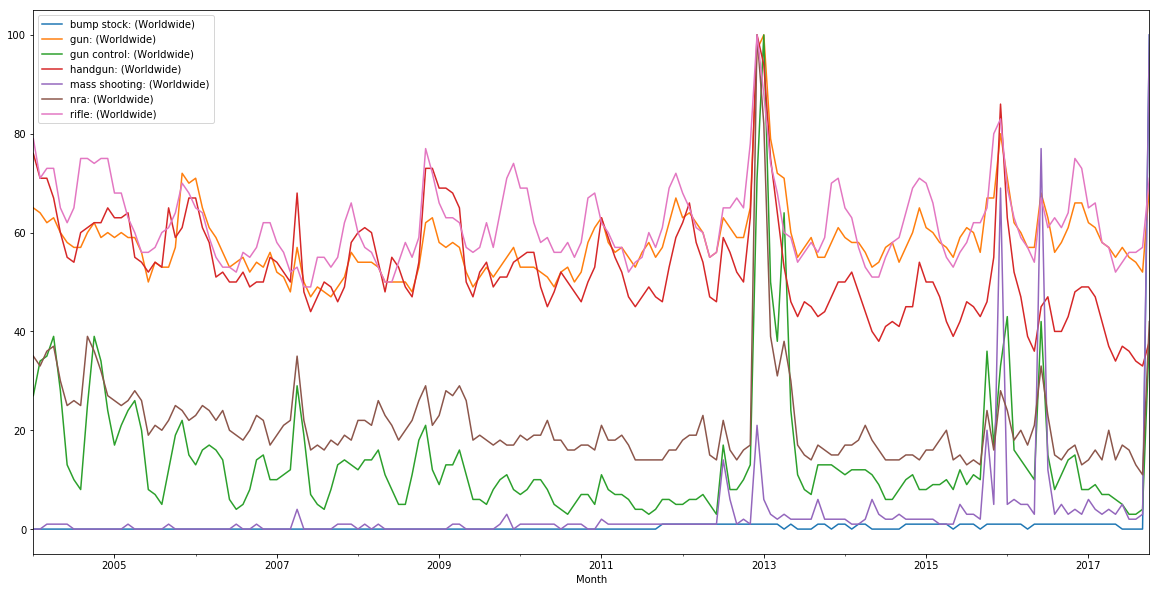

In [24]:
gt_BumpStock = pd.read_csv(r'files/gt_Bump_Stock.csv', encoding = "ISO-8859-1", parse_dates=["Month"])
gt_Gun = pd.read_csv(r'files/gt_Gun.csv', encoding = "ISO-8859-1", parse_dates=["Month"])
gt_Gun_Control = pd.read_csv(r'files/gt_Gun_Control.csv', encoding = "ISO-8859-1", parse_dates=["Month"])
gt_handgun = pd.read_csv(r'files/gt_handgun.csv', encoding = "ISO-8859-1", parse_dates=["Month"])
gt_Mass_Shooting = pd.read_csv(r'files/gt_Mass_Shooting.csv', encoding = "ISO-8859-1", parse_dates=["Month"])
gt_NRA = pd.read_csv(r'files/gt_NRA.csv', encoding = "ISO-8859-1", parse_dates=["Month"])
gt_Rifle = pd.read_csv(r'files/gt_Rifle.csv', encoding = "ISO-8859-1", parse_dates=["Month"])

gt_BumpStock.set_index('Month', inplace = True)
gt_Gun.set_index('Month', inplace = True)
gt_Gun_Control.set_index('Month', inplace = True)
gt_handgun.set_index('Month', inplace = True)
gt_Mass_Shooting.set_index('Month', inplace = True)
gt_NRA.set_index('Month', inplace = True)
gt_Rifle.set_index('Month', inplace = True)

gt = pd.concat([gt_BumpStock, gt_Gun, gt_Gun_Control, gt_handgun, gt_Mass_Shooting, gt_NRA, gt_Rifle], axis = 1,)
gt.plot(figsize=(20,10))

The above code block imports all of the google trends data that was selected. Terms were selected based upon the paper Traders, guns, and money: The effects of mass shootings on stock prices of firearm manufacturers in the U.S.

Google trends data isnt given in raw search terms, ie 500,000 unique searches for 'gun control' but rather as a interest level. 100 is peak interest and 0 is low interest. All search terms had to be collected individually as collecting them in one go results in the interest being relative to eachother. This would mean that bump stock for example would still be negliable compared to more popular terms ('gun', 'rifle', etc).

From the above we can observe that there are clear peaks in search term interest, however we cannot be sure if these are due to mass shooting as of yet. The below code will attempt to ascertain this.

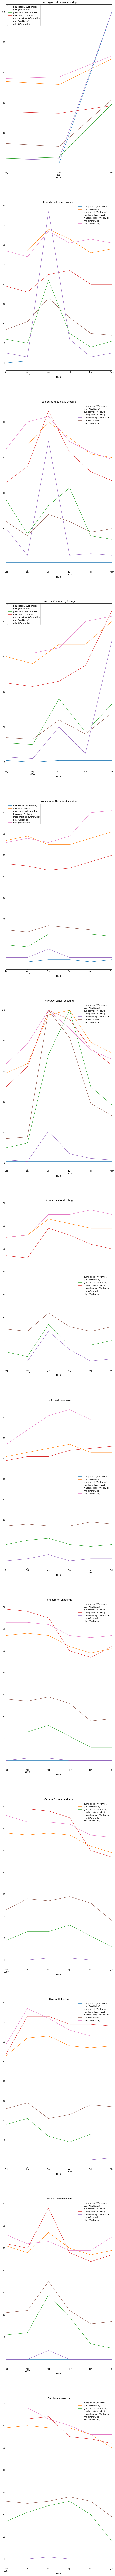

In [25]:
import datetime

fig, axs = plt.subplots(len(dfMostDeadly),1)
for x in range(0,len(dfMostDeadly)):
    gt[(gt.index >= dfMostDeadly.iloc[x]["Date"] - datetime.timedelta(3*365/12)) & (gt.index <= dfMostDeadly.iloc[x]["Date"] + datetime.timedelta(3*365/12))].plot(figsize = (10,250),ax = axs[x], title = dfMostDeadly.iloc[x]["Title"])
   

The above code uses the date of mass shootings to substantiate a centre point for each of the mass shootings that occur after 2004 and have more than 15 fatalities. It also plots the data either side of the event so that a fair comparison can be made. The periods choosen are three months before and three months after the occurance.

From the above data we can see that the months around shootings appear to result in a peak of searches in relation to gun and mass shooting topics. A prime example of this is the Sandy Hook mass shooting in which gun control and NRA reach all time high points in interest. This illustrates that there is a clear effect of the mass shootings in relation to search terms associated with gun violence.

Another example of this is the spike in search terms relating to Bump Stocks after the Las Vegas Strip shooting. The bump stock was the primary accessory that enabled the shooter to fire at such a rapid rate.

# Conclusion

From the above data analysis we can draw the following conclusions:
- That mass shootings in the U.S.A have become more frequent over the years.
- Determining stock data based off mass shootings provides inconclusive results, due to tests not being valid.
- Mass shootings do influence Google search term trends.